# Projeto 2 - Ciência dos Dados




Nome: Bruno Freitas do Nascimento Rodrigues

Nome: Paulo Augusto dos Passos Oliveira

___
Importando Bibliotecas necessárias:

In [62]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import plotly.express as px 
from IPython.display import display

Checando se dataset foi encontrado:

In [4]:
filename = 'heart_failure.csv'
if filename in os.listdir():
    print(f'O arquivo {filename} foi encontrado, tudo certo para prosseguir!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

O arquivo heart_failure.csv foi encontrado, tudo certo para prosseguir!


## Descrição das colunas do conjunto de dados:

** age**: idade da pessoa em anos.<br>
** anamia**: se a pessoa está animica ou não (booleana).<br>
** creatinine_phosphokinase**: contidade de Creatinofosfoquinase presente no sangue em microgramas por litro (mcg/L).<br>
** diabetes**: se a pessoa é diabética ou não (booleana).<br>
** ejection_fraction**: porcetagem do sangue deixa o coração a após a contração.<br>
** high_blood_pressure**: se a pessoa tem hipertensão ou não (booleana).<br>
** platelets**: quantidade de plaquetas no sangue em kiloplaquetas por mililitro (kplaquetas/mL).<br>
** serum_creatinine**: quantidade de creatinina no sangue em miligramas por decilitro (mg/dL).<br>
** serum_sodium**: quantidade de sódio no sangue em miliequivalentes por litro (mEq/L).<br>
** sex**: sexo da pessoa dividido em feminino e masculino, sendo 0=feminino e 1=masculino (binário).<br>
** smoking**: se a pessoa fuma ou não (booleana).<br>
** time**: tempo de acompanhamento após a falha cardíaca em dias.<br>
** DEATH_EVENT**: se a pessoa foi a óbito ou não (booleana).

** Configuração do arquivo: **

In [51]:
dados = pd.read_csv(filename)
dados.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [54]:
#Assegurando que todas as gategorias sejam intrepetadas corretamente
dados['age'] = dados['age'].astype('float64')
dados['anaemia'] = dados['anaemia'].astype('category')
dados['creatinine_phosphokinase'] = dados['creatinine_phosphokinase'].astype('float64')
dados['diabetes'] = dados['diabetes'].astype('category')
dados['ejection_fraction'] = dados['ejection_fraction'].astype('float64')
dados['high_blood_pressure'] = dados['high_blood_pressure'].astype('category')
dados['platelets'] = dados['platelets'].astype('float64')
dados['serum_sodium'] = dados['serum_sodium'].astype('float64')
dados['sex'] = dados['sex'].astype('category')
dados['smoking'] = dados['smoking'].astype('category')
dados['time'] = dados['time'].astype('float64')
dados['DEATH_EVENT'] = dados['DEATH_EVENT'].astype('category')

#Motificando os parametros 0 e 1 para sim e não
dados.anaemia.cat.categories = ['não', 'sim']
dados.diabetes.cat.categories = ['não', 'sim']
dados.high_blood_pressure.cat.categories = ['não', 'sim']
dados.sex.cat.categories = ['M', 'F']
dados.smoking.cat.categories = ['não', 'sim']
dados.DEATH_EVENT.cat.categories = ['não', 'sim']


dados.anaemia = pd.Categorical(dados.anaemia, categories=['não', 'sim'], ordered=False)
dados.diabetes = pd.Categorical(dados.diabetes, categories=['não', 'sim'], ordered=False)
dados.high_blood_pressure = pd.Categorical(dados.high_blood_pressure, categories=['não', 'sim'], ordered=False)
dados.smoking = pd.Categorical(dados.smoking, categories=['não', 'sim'], ordered=False)
dados.DEATH_EVENT = pd.Categorical(dados.DEATH_EVENT, categories=['não', 'sim'], ordered=False)

In [93]:

dados.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Análise comparattiva de histogramas das features entre caso DEATH_EVENT = True e DEATH_EVENT = False

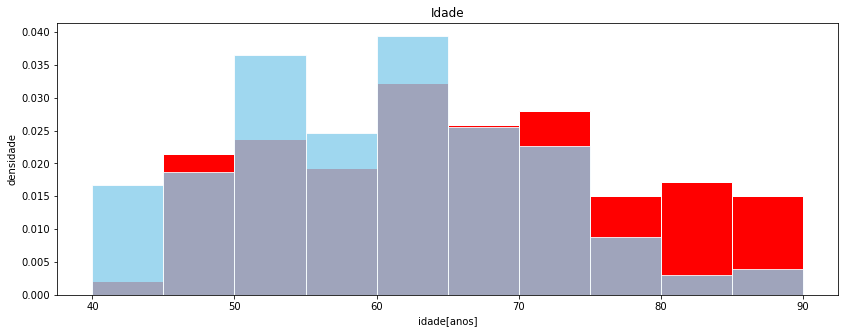

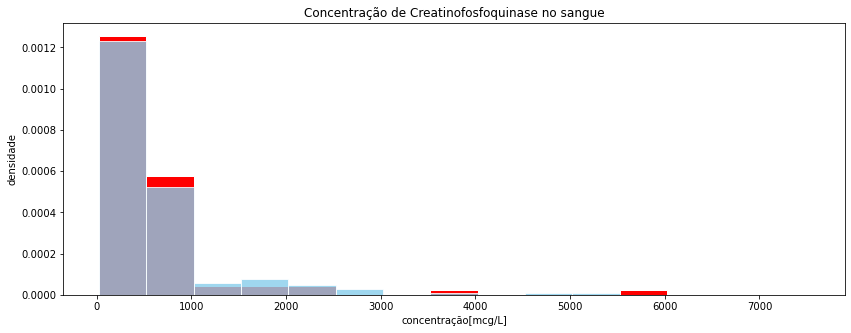

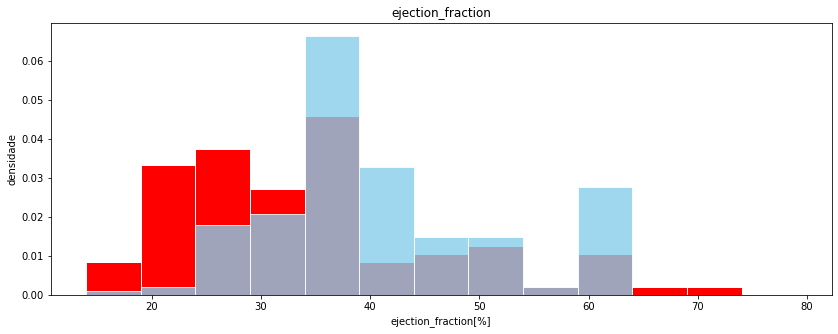

In [95]:
#Divisão entre sobreviventes e mortos
dead = dados[dados["DEATH_EVENT"]=='sim']
not_dead = dados[dados["DEATH_EVENT"]=='não']

#Histograma da idade dos sobreviventes e não sobreviventes
faixas = np.arange(40,95,5)
plt.figure(figsize=(14, 5))
plt.hist(dead.age, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.age, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Idade')
plt.xlabel('idade[anos]')
plt.ylabel('densidade')
plt.show()

#Histograma da idade dos sobreviventes e não sobreviventes
faixas = np.arange(23,7861,500)
plt.figure(figsize=(14, 5))
plt.hist(dead.creatinine_phosphokinase, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.creatinine_phosphokinase, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Concentração de Creatinofosfoquinase no sangue')
plt.xlabel('concentração[mcg/L]')
plt.ylabel('densidade')
plt.show()

#Histograma da idade dos sobreviventes e não sobreviventes
faixas = np.arange(14,80,5)
plt.figure(figsize=(14, 5))
plt.hist(dead.ejection_fraction, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.ejection_fraction, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('ejection_fraction')
plt.xlabel('ejection_fraction[%]')
plt.ylabel('densidade')
plt.show()

In [64]:
px.histogram(dados, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dados.columns)